___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this assignment, you must apply ***EDA*** processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges. 

Also, this project aims to improve your ability to implement algorithms for ***Multi-Class Classification***. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

---
---

# #Determines

Dataset contains tree observations from four areas of one national forest district. This dataset includes information on tree type, shadow coverage, distance to nearby landmarks, soil type, and local topography. The goal of the project is to build a model that predicts what types of trees grow in an area.
***The Forest Dataset*** contains approximately 600 thousand lines, also you can easily find many information about it on the web (especially Kaggle).

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (forest, trees) knowledge on the internet to get to know the data set in the fastest way. 

You should implement cleaning, handling with outliers and missing values using Pandas, NumPy and other required modules for the best result in modeling. You should do Feature Engineering.

After that, your final dataset with the new variables you have created will be ready for model building. You will implement ***Support Vector Machine, XGBoost, Random Forest, Desicion Tree*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, create a chart comparing the performance of all models and choose the most successful model.


---
---

# #Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Load Dataset*
    
    *iii. Explore Data*

#### 2.  Data Cleaning
- Detect Missing Values and Outliers 

    *i. Missing Value Detection*
    
    *ii. Outlier Detection*
    
- Deal with Outliers
    
    *i. Drop Outliers*


#### 3. Feature Engineering


#### 4. Prediction (Multi-class Classification)
- Import libraries
- Data Preprocessing
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



---
---

## 1. Exploratory Data Analysis

### Import Libraries, Load Dataset, Exploring Data

#### *i. Import Libraries*

Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
# plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.max_rows = 30
pd.options.display.max_columns = 30

#### *ii. Load Dataset*

In [3]:
df2=pd.read_csv("treetypes.csv")

In [4]:
df = df2.copy() # I make a copy just in case

#### *iii. Explore Data*
- Focus on numerical and categorical data
- Detect Number of Unique values of each column
- Focus on Target Variable (Cover_Type)
 - Detect relationships and correlations between independent variables and target variable.
 - It may be nice to visualize the class frequencies of the target variable.
- Detect relationships and correlations between independent variables. (You can prefer to keep only one of the highly correlated continuous variables.)
- Consider dropping features that contain little data or that you think will not contribute to the model.

In [7]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,...,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2696,123,10,212,48,2245,237,231,123,2113,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
1,3269,110,19,134,40,3734,249,216,88,3960,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,3283,322,18,346,104,4369,170,217,185,1330,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7
3,2847,89,31,270,175,1320,248,173,29,889,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
4,3248,93,12,507,118,570,239,221,110,945,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,7


In [8]:
df.shape

(250000, 55)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           250000 non-null  int64
 1   Aspect                              250000 non-null  int64
 2   Slope                               250000 non-null  int64
 3   Horizontal_Distance_To_Hydrology    250000 non-null  int64
 4   Vertical_Distance_To_Hydrology      250000 non-null  int64
 5   Horizontal_Distance_To_Roadways     250000 non-null  int64
 6   Hillshade_9am                       250000 non-null  int64
 7   Hillshade_Noon                      250000 non-null  int64
 8   Hillshade_3pm                       250000 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  250000 non-null  int64
 10  Wilderness_Area_1                   250000 non-null  int64
 11  Wilderness_Area_2                   250000 non-null 

In [10]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,...,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
count,250000.000,250000.000,250000.000,250000.000,250000.000,250000.000,250000.000,250000.000,250000.000,250000.000,250000.000,250000.000,250000.000,250000.000,250000.000,...,250000.000,250000.000,250000.000,250000.000,250000.000,250000.000,250000.000,250000.000,250000.000,250000.000,250000.000,250000.000,250000.000,250000.000,250000.000
mean,2748.505,156.212,16.331,228.094,50.898,1719.967,212.370,218.511,134.503,1521.757,0.238,0.033,0.418,0.309,0.018,...,0.001,0.001,0.085,0.047,0.020,0.042,0.040,0.002,0.006,0.000,0.002,0.046,0.041,0.027,4.000
std,418.301,109.653,8.317,209.630,61.007,1330.818,30.655,22.681,46.034,1107.378,0.426,0.180,0.493,0.462,0.134,...,0.029,0.024,0.278,0.212,0.140,0.200,0.196,0.039,0.080,0.020,0.043,0.210,0.199,0.162,2.001
min,1859.000,0.000,0.000,0.000,-163.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
25%,2375.000,65.000,10.000,66.000,5.000,756.000,195.000,206.000,106.000,734.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000
50%,2753.000,125.000,15.000,180.000,32.000,1318.000,220.000,222.000,137.000,1273.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000
75%,3108.000,260.000,22.000,330.000,79.000,2294.000,235.000,235.000,167.000,1998.000,0.000,0.000,1.000,1.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,6.000
max,3857.000,360.000,65.000,1390.000,598.000,7112.000,254.000,254.000,252.000,7150.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,7.000


In [11]:
df.isnull().sum()

Elevation                           0
Aspect                              0
Slope                               0
Horizontal_Distance_To_Hydrology    0
Vertical_Distance_To_Hydrology      0
                                   ..
Soil_Type_37                        0
Soil_Type_38                        0
Soil_Type_39                        0
Soil_Type_40                        0
Cover_Type                          0
Length: 55, dtype: int64

In [12]:
df.isnull().sum().sum()

0

In [13]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_1',
       'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4',
       'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4',
       'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8',
       'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12',
       'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16',
       'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20',
       'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24',
       'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28',
       'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32',
       'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36',
       'Soil_Type_37', '

In [14]:
for i in df.columns:
    print(f"{i:<40}: {df[i].nunique()}")
# df.apply(lambda i:i.nunique())

Elevation                               : 1983
Aspect                                  : 361
Slope                                   : 59
Horizontal_Distance_To_Hydrology        : 1294
Vertical_Distance_To_Hydrology          : 578
Horizontal_Distance_To_Roadways         : 6501
Hillshade_9am                           : 207
Hillshade_Noon                          : 165
Hillshade_3pm                           : 253
Horizontal_Distance_To_Fire_Points      : 6487
Wilderness_Area_1                       : 2
Wilderness_Area_2                       : 2
Wilderness_Area_3                       : 2
Wilderness_Area_4                       : 2
Soil_Type_1                             : 2
Soil_Type_2                             : 2
Soil_Type_3                             : 2
Soil_Type_4                             : 2
Soil_Type_5                             : 2
Soil_Type_6                             : 2
Soil_Type_7                             : 2
Soil_Type_8                             : 2
Soil_Type

In [19]:
df["Cover_Type"].value_counts().sort_values()

3    14134
5    14250
2    14288
4    14293
1    14296
7    14352
6    14387
Name: Cover_Type, dtype: int64

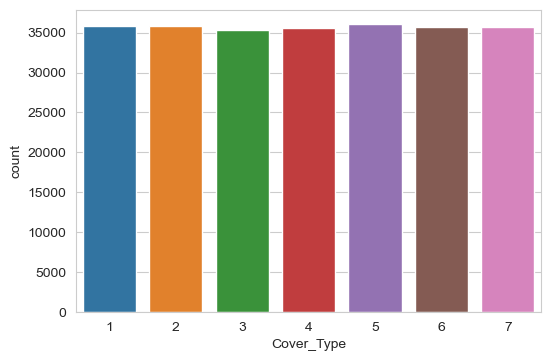

In [15]:
sns.countplot(df.Cover_Type)
sns.set_theme(style="darkgrid");

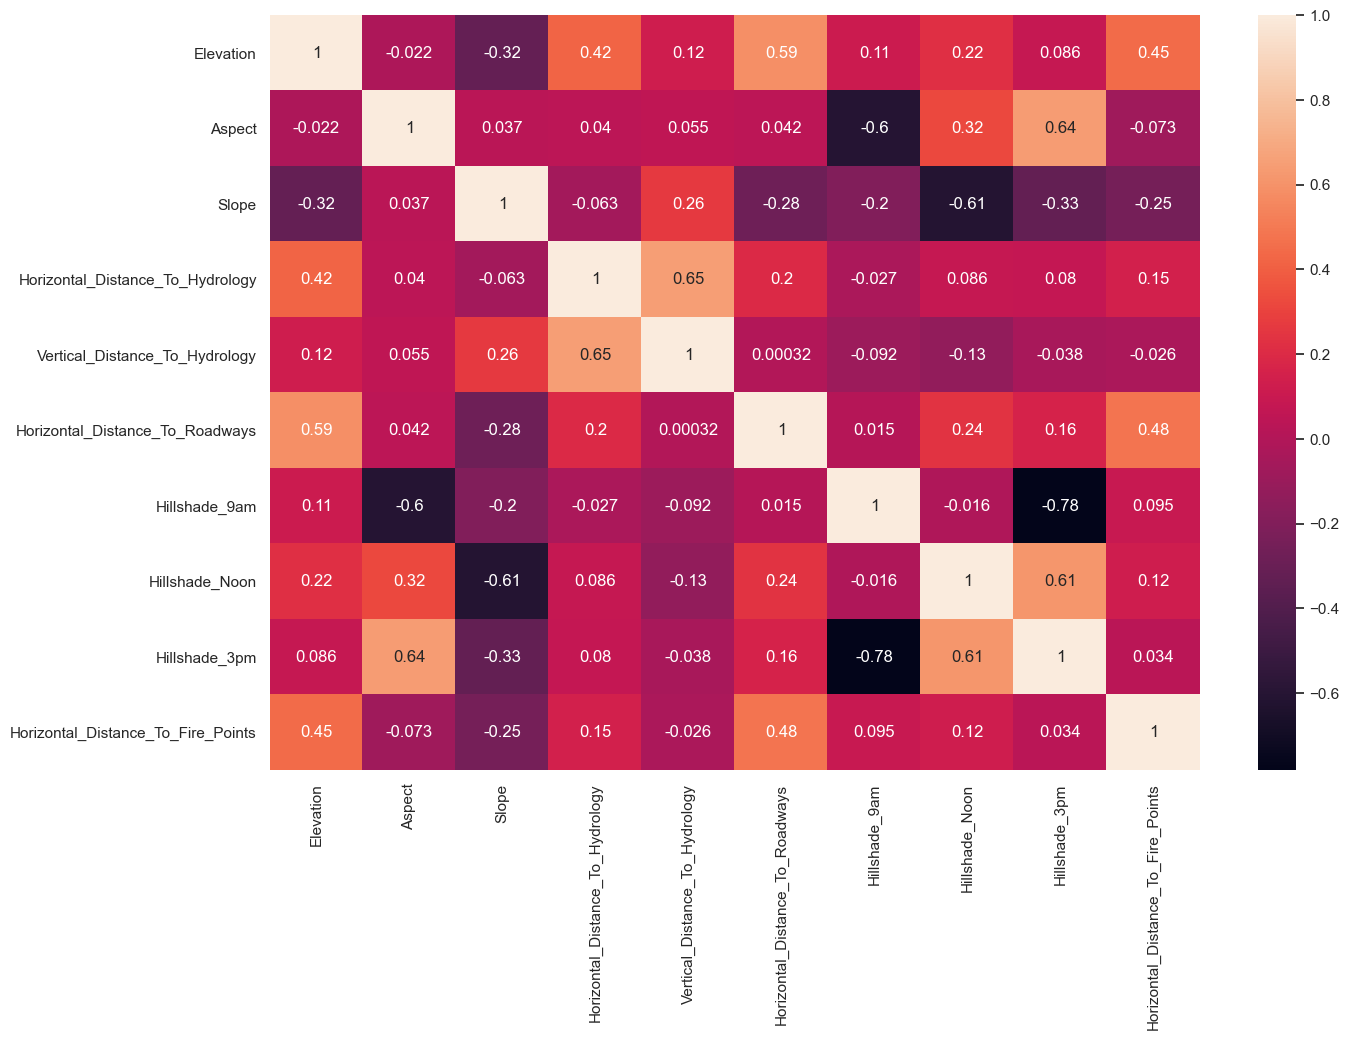

In [20]:
plt.figure(figsize=(15,10))
sns.heatmap(df.iloc[:,:10].corr(),annot=True);

In [21]:
df.iloc[:,:10].corr()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
Elevation,1.000,-0.022,-0.320,0.418,0.123,0.588,0.110,0.224,0.086,0.447
Aspect,-0.022,1.000,0.037,0.040,0.055,0.042,-0.604,0.322,0.639,-0.073
Slope,-0.320,0.037,1.000,-0.063,0.264,-0.280,-0.199,-0.612,-0.326,-0.247
Horizontal_Distance_To_Hydrology,0.418,0.040,-0.063,1.000,0.649,0.199,-0.027,0.086,0.080,0.150
Vertical_Distance_To_Hydrology,0.123,0.055,0.264,0.649,1.000,0.000,-0.092,-0.133,-0.038,-0.026
Horizontal_Distance_To_Roadways,0.588,0.042,-0.280,0.199,0.000,1.000,0.015,0.241,0.161,0.482
Hillshade_9am,0.110,-0.604,-0.199,-0.027,-0.092,0.015,1.000,-0.016,-0.782,0.095
Hillshade_Noon,0.224,0.322,-0.612,0.086,-0.133,0.241,-0.016,1.000,0.614,0.124
Hillshade_3pm,0.086,0.639,-0.326,0.080,-0.038,0.161,-0.782,0.614,1.000,0.034
Horizontal_Distance_To_Fire_Points,0.447,-0.073,-0.247,0.150,-0.026,0.482,0.095,0.124,0.034,1.000


***
***

## 2.  Data Cleaning

### Detect Missing Values and Outliers

#### *i. Missing Value Detection*

In [24]:
df.isnull().sum().sum()

0

#### *ii. Outlier Detection*

The columns which have continuous value should be examined in terms of [outliers](https://datascience.foundation/sciencewhitepaper/knowing-all-about-outliers-in-machine-learning) (Watch out for columns that look like continuous but not continuous!). Some algorithms are [sensitive to outliers](https://arsrinevetha.medium.com/ml-algorithms-sensitivity-towards-outliers-f3862a13c94d), but some algorithms can tolerate them. You can decide to outlier detection according to the algorithm you will use.
- You can check the outliers shape of continous features with respect to the target (Cover_Type) classes.
- You can check how many outliers are there of each continuous variables.
- The columns which have continuous value should be examined in terms of outliers.
- You can define a function to detect outliers in accordance with the ``zscore`` or ``IQR``.

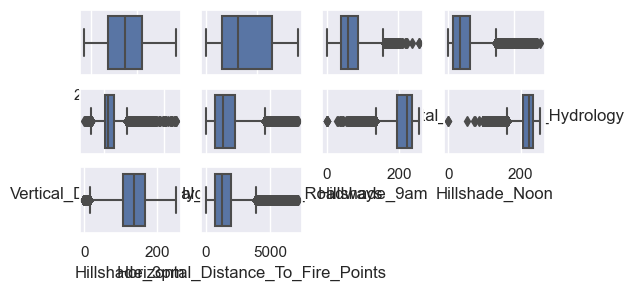

In [24]:
a=0

for i in df.columns[:10]:
    a = a+1
    plt.subplot(4,4,a)
    sns.boxplot(x=i, data=df, whis=1.5)

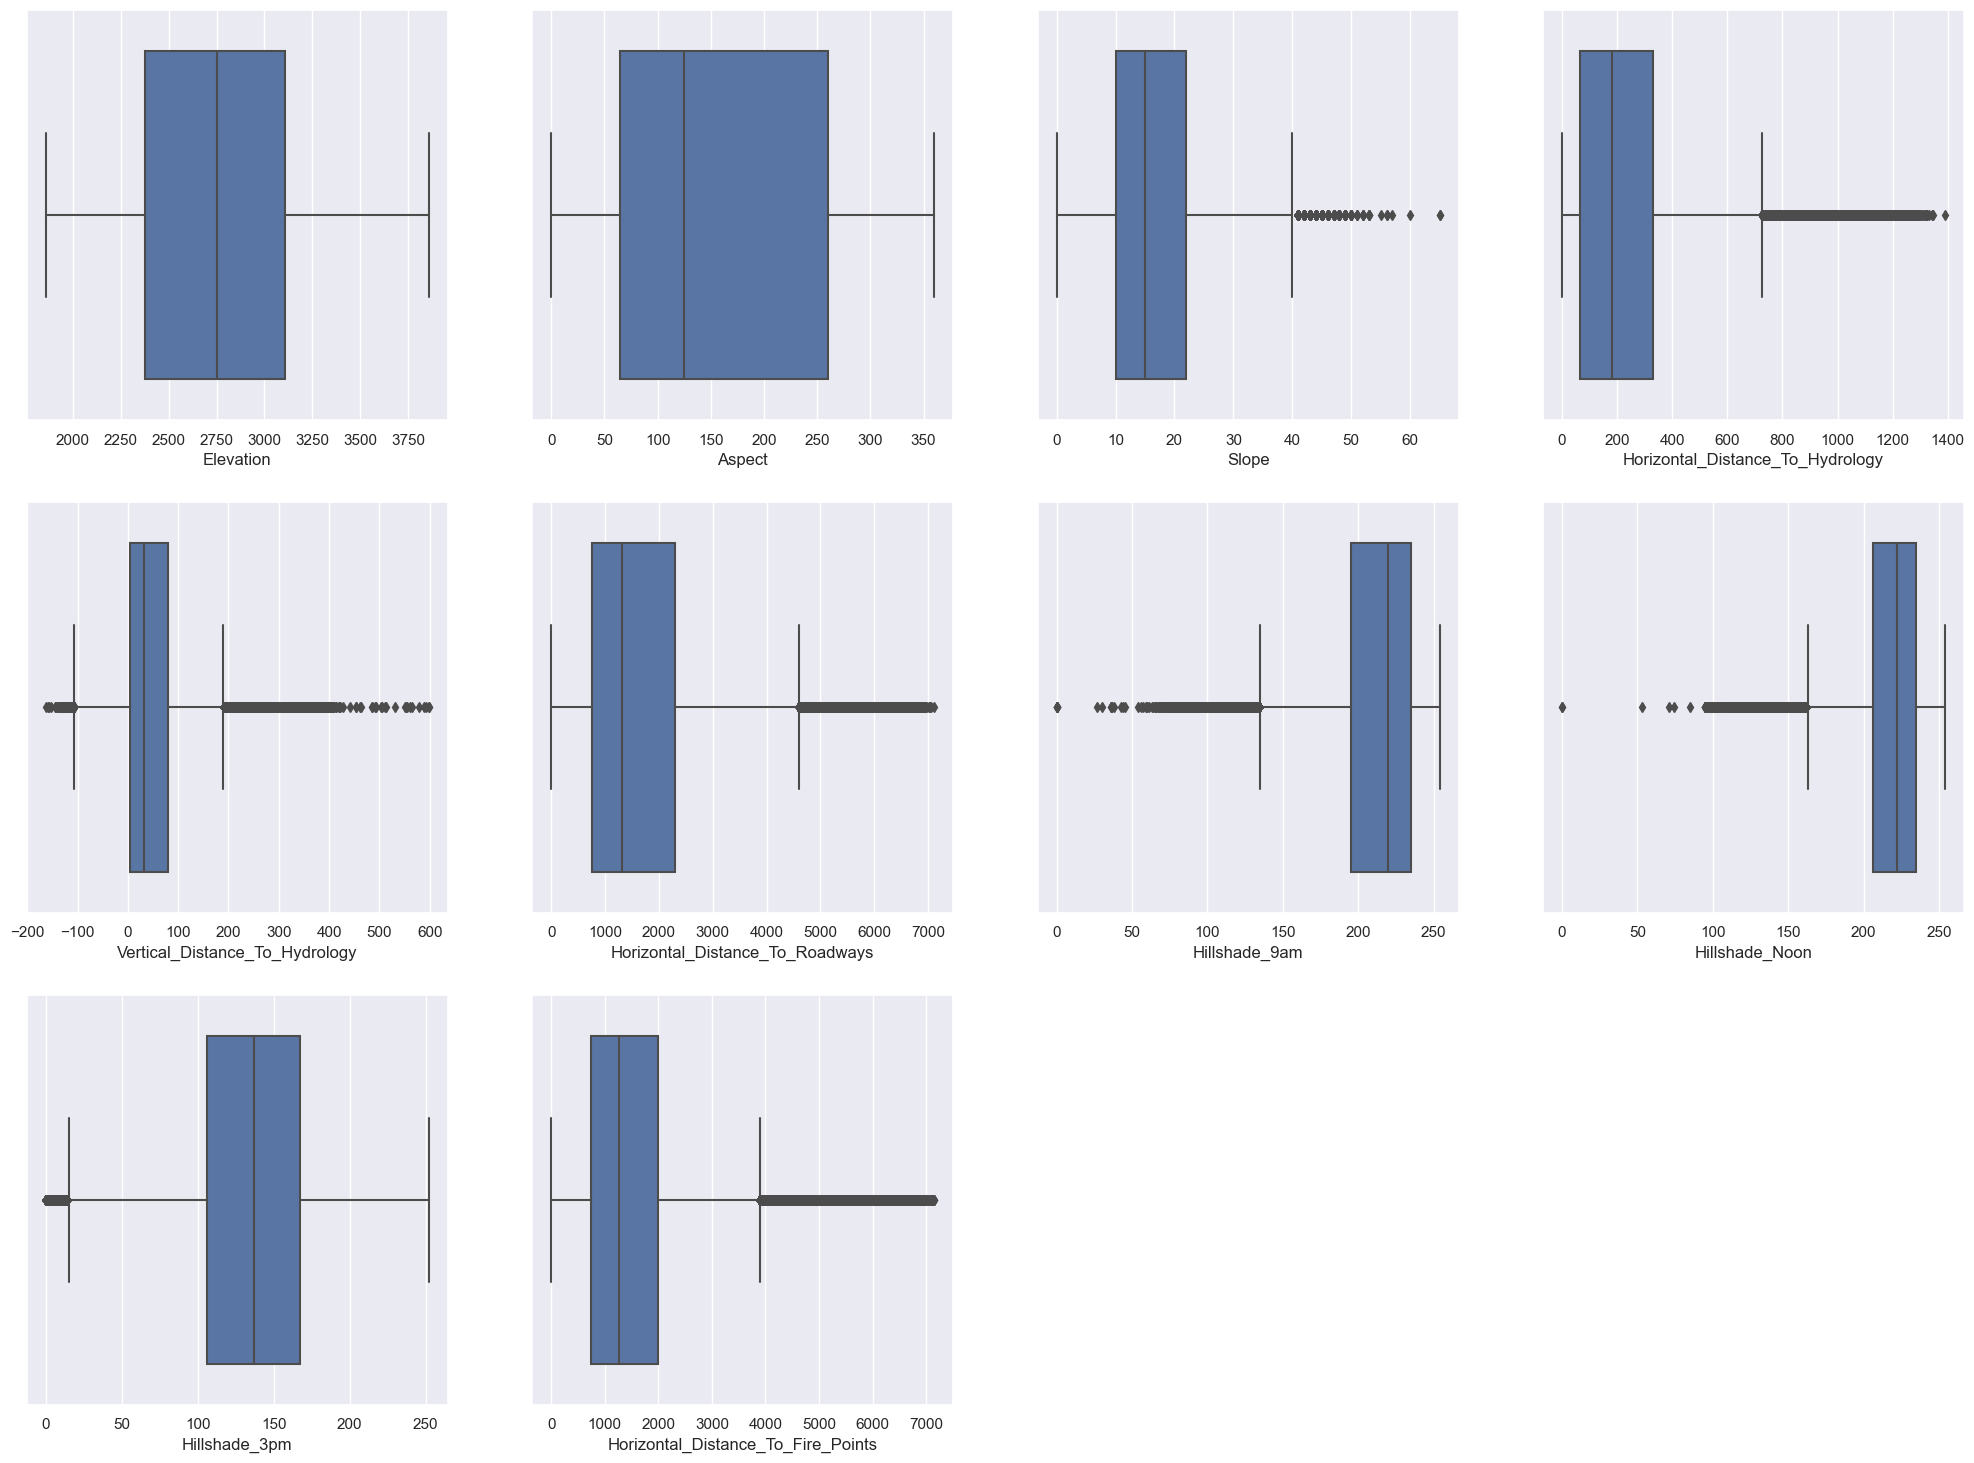

In [25]:
a=0
plt.figure(figsize=(25,25))
for i in df.columns[:10]:
    a = a+1
    plt.subplot(4,4,a)
    sns.boxplot(x=i, data=df, whis=1.5)   # It is  better so.

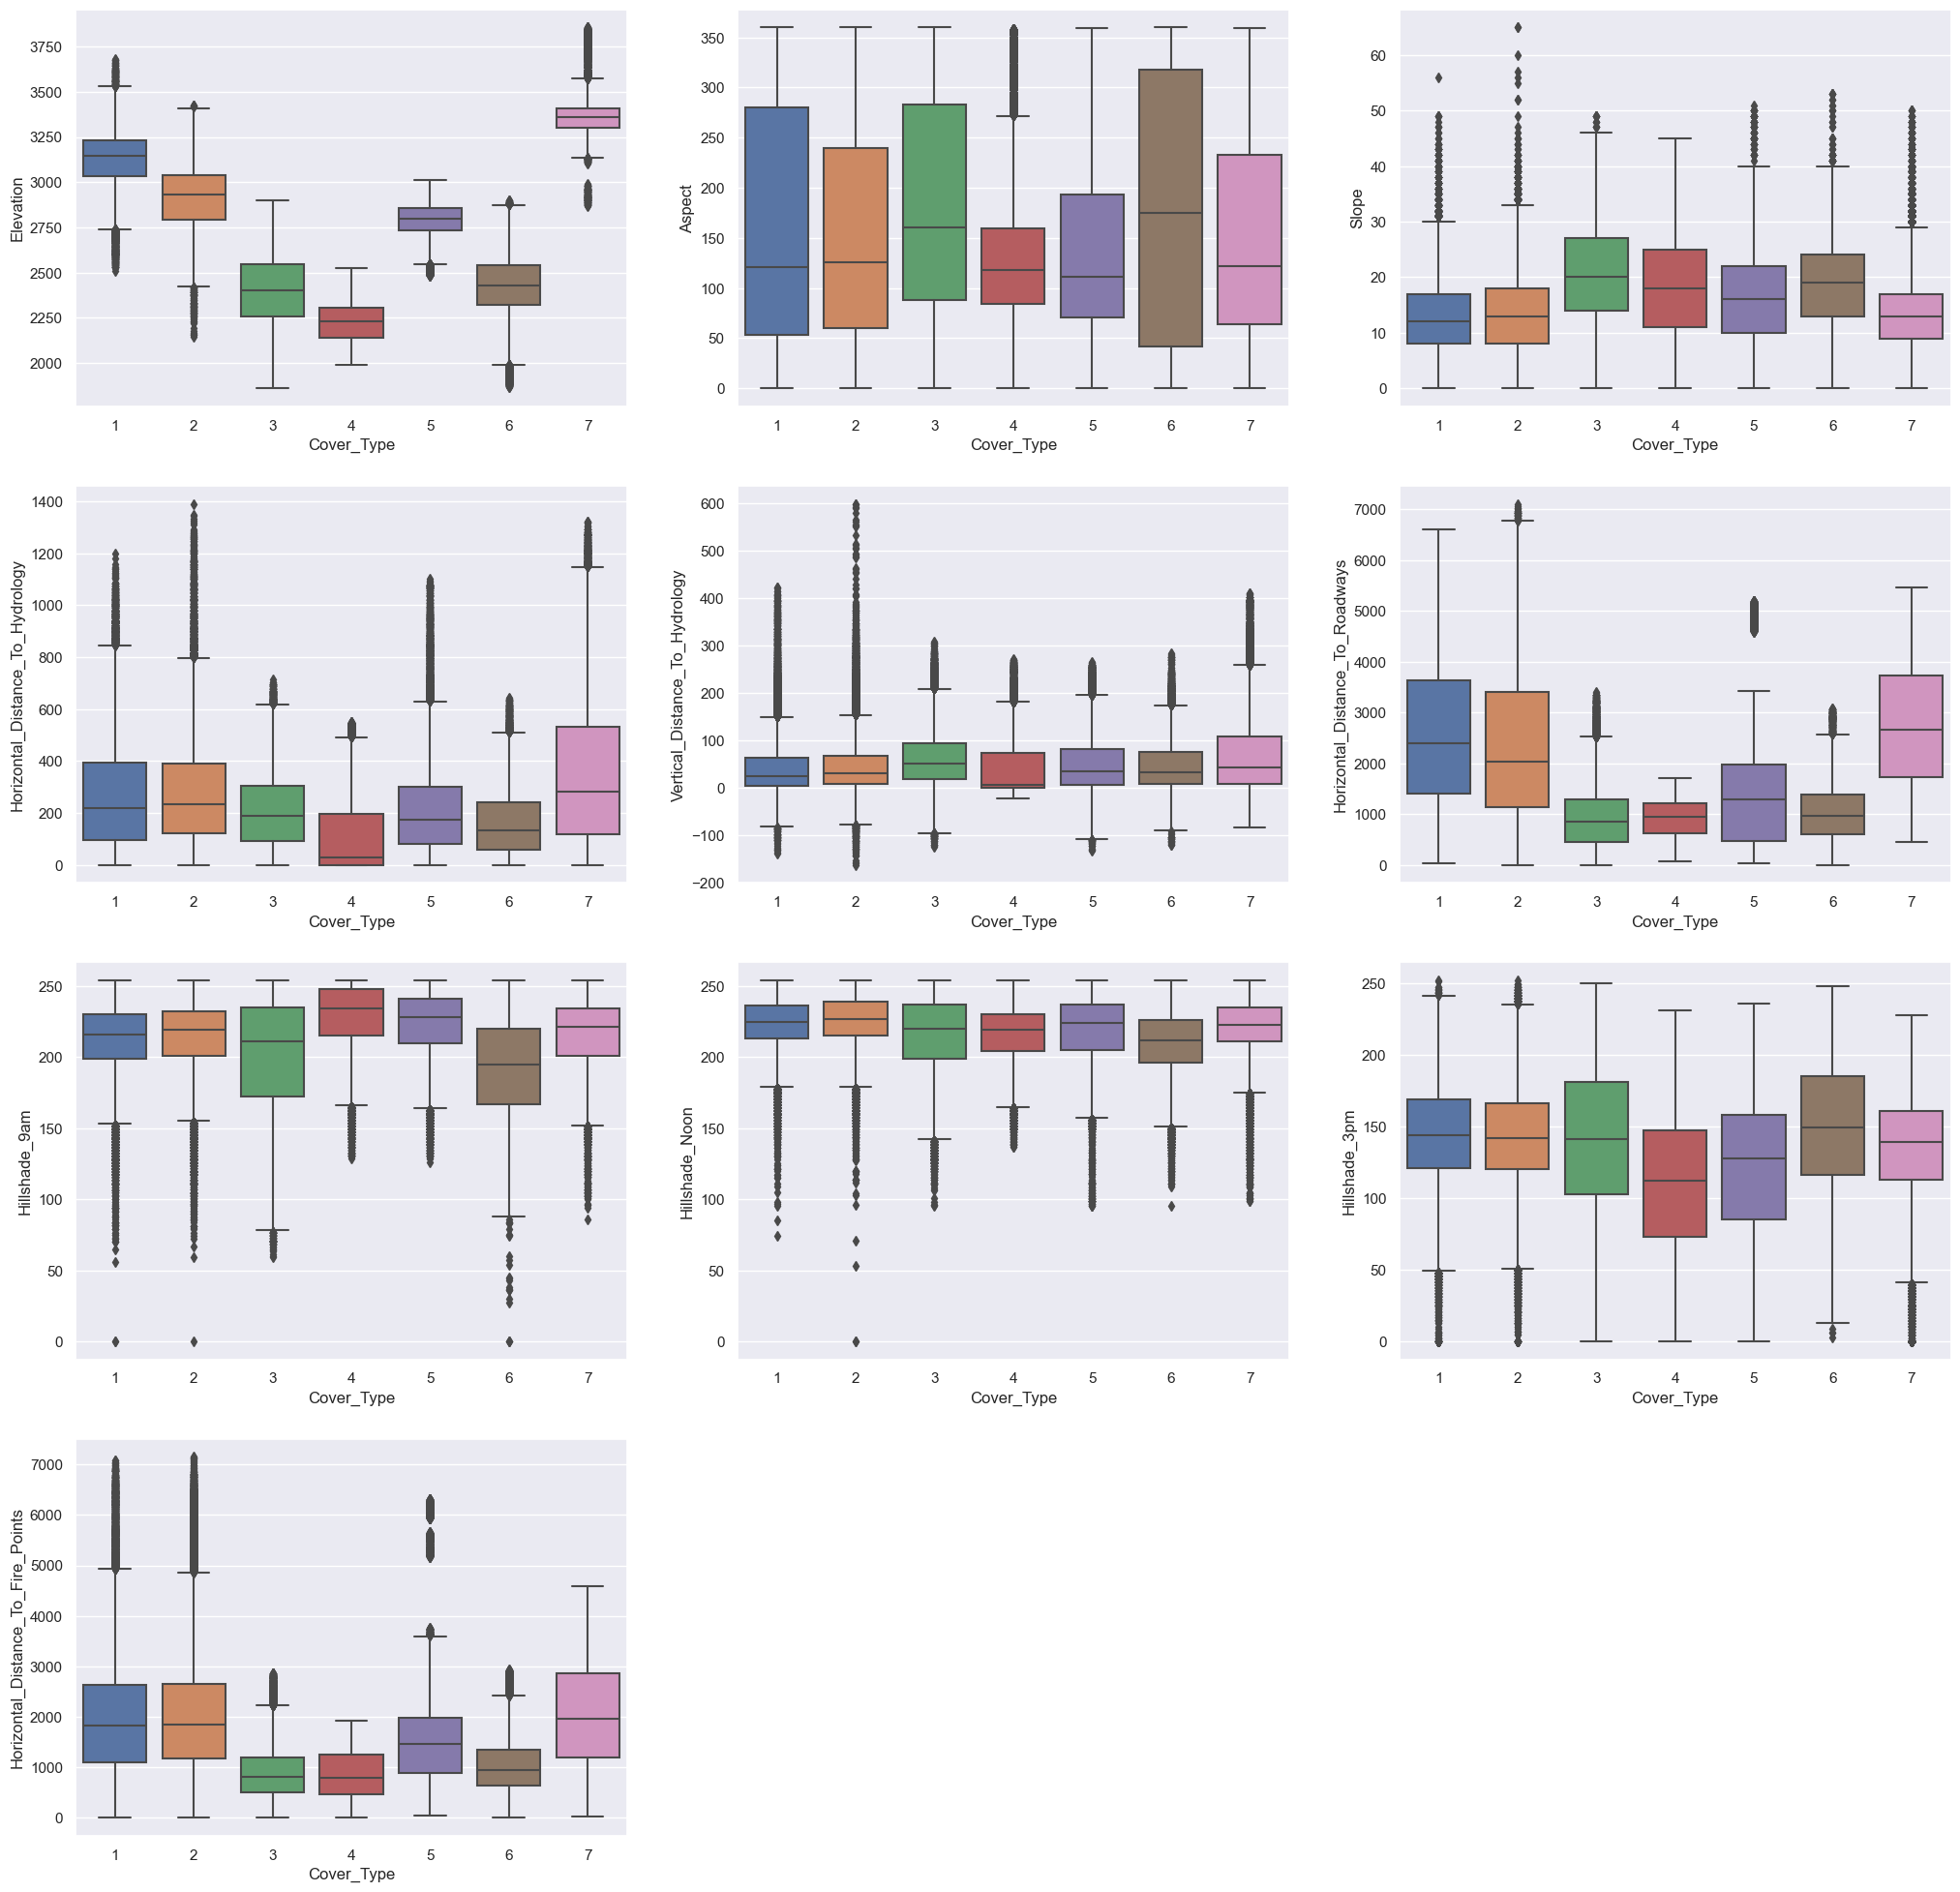

In [27]:
a=0
plt.figure(figsize=(25,25))
for i in df.columns[:10]:
    a = a+1
    plt.subplot(4,3,a)
    sns.boxplot(x="Cover_Type",y=i,data=df, whis=1.5)

### Deal with Outliers

#### *ii. Drop Outliers*

In [29]:
def out_lüger(df_in, column):
    q1=df_in[column].quantile(0.25)
    q3=df_in[column].quantile(0.75)
    ıqr=q3-q1
    low_lim=q1-3*ıqr
    high_lim=q3+3*ıqr
    df_out_ind=df_in[~((df_in[column]<low_lim) | (df_in[column]>high_lim))]
    return df_out_ind

In [30]:
out_lüger(df,"Horizontal_Distance_To_Hydrology")

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,...,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2696,123,10,212,48,2245,237,231,123,2113,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
1,3269,110,19,134,40,3734,249,216,88,3960,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,3283,322,18,346,104,4369,170,217,185,1330,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7
3,2847,89,31,270,175,1320,248,173,29,889,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
4,3248,93,12,507,118,570,239,221,110,945,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,2112,339,39,49,17,467,107,151,162,435,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
249996,2872,90,31,251,147,2027,248,172,27,508,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
249997,2336,57,5,0,0,1429,224,228,139,387,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
249998,2563,181,10,0,0,1349,223,246,156,1007,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5


In [31]:
out_lüger(df,"Horizontal_Distance_To_Hydrology").shape

(249268, 55)

In [32]:
for column in df.columns[:10]:
    df3=out_lüger(df,column)

In [33]:
df3.shape[0]


247606

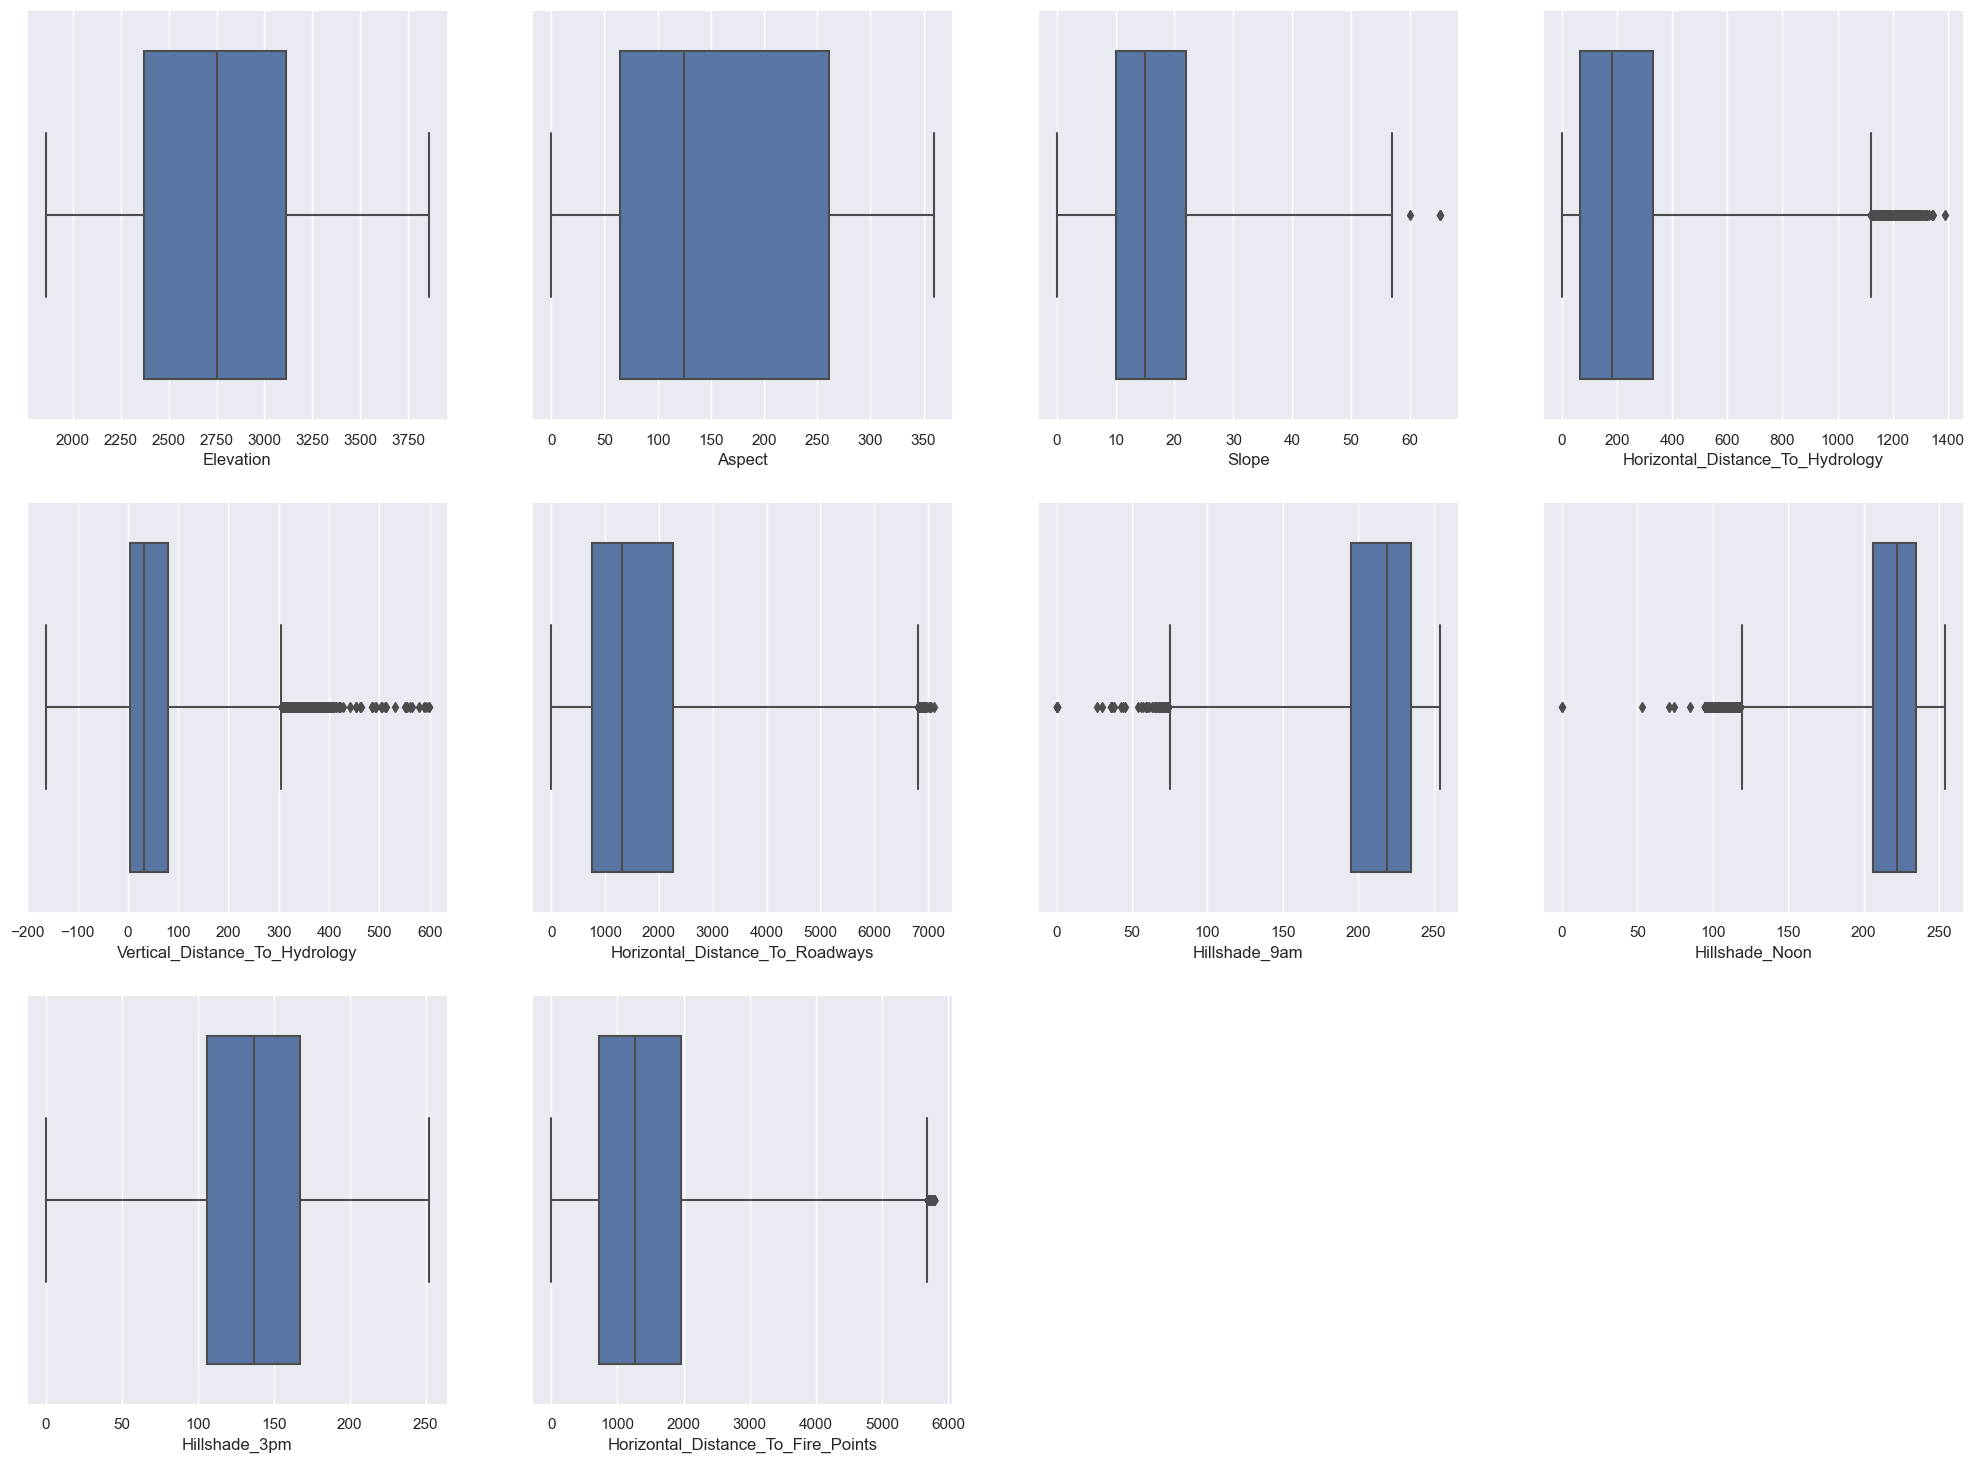

In [34]:
a=0
plt.figure(figsize=(25,25))
for i in df3.columns[:10]:
    a = a+1
    plt.subplot(4,4,a)
    sns.boxplot(x=i,data=df3, whis=3)

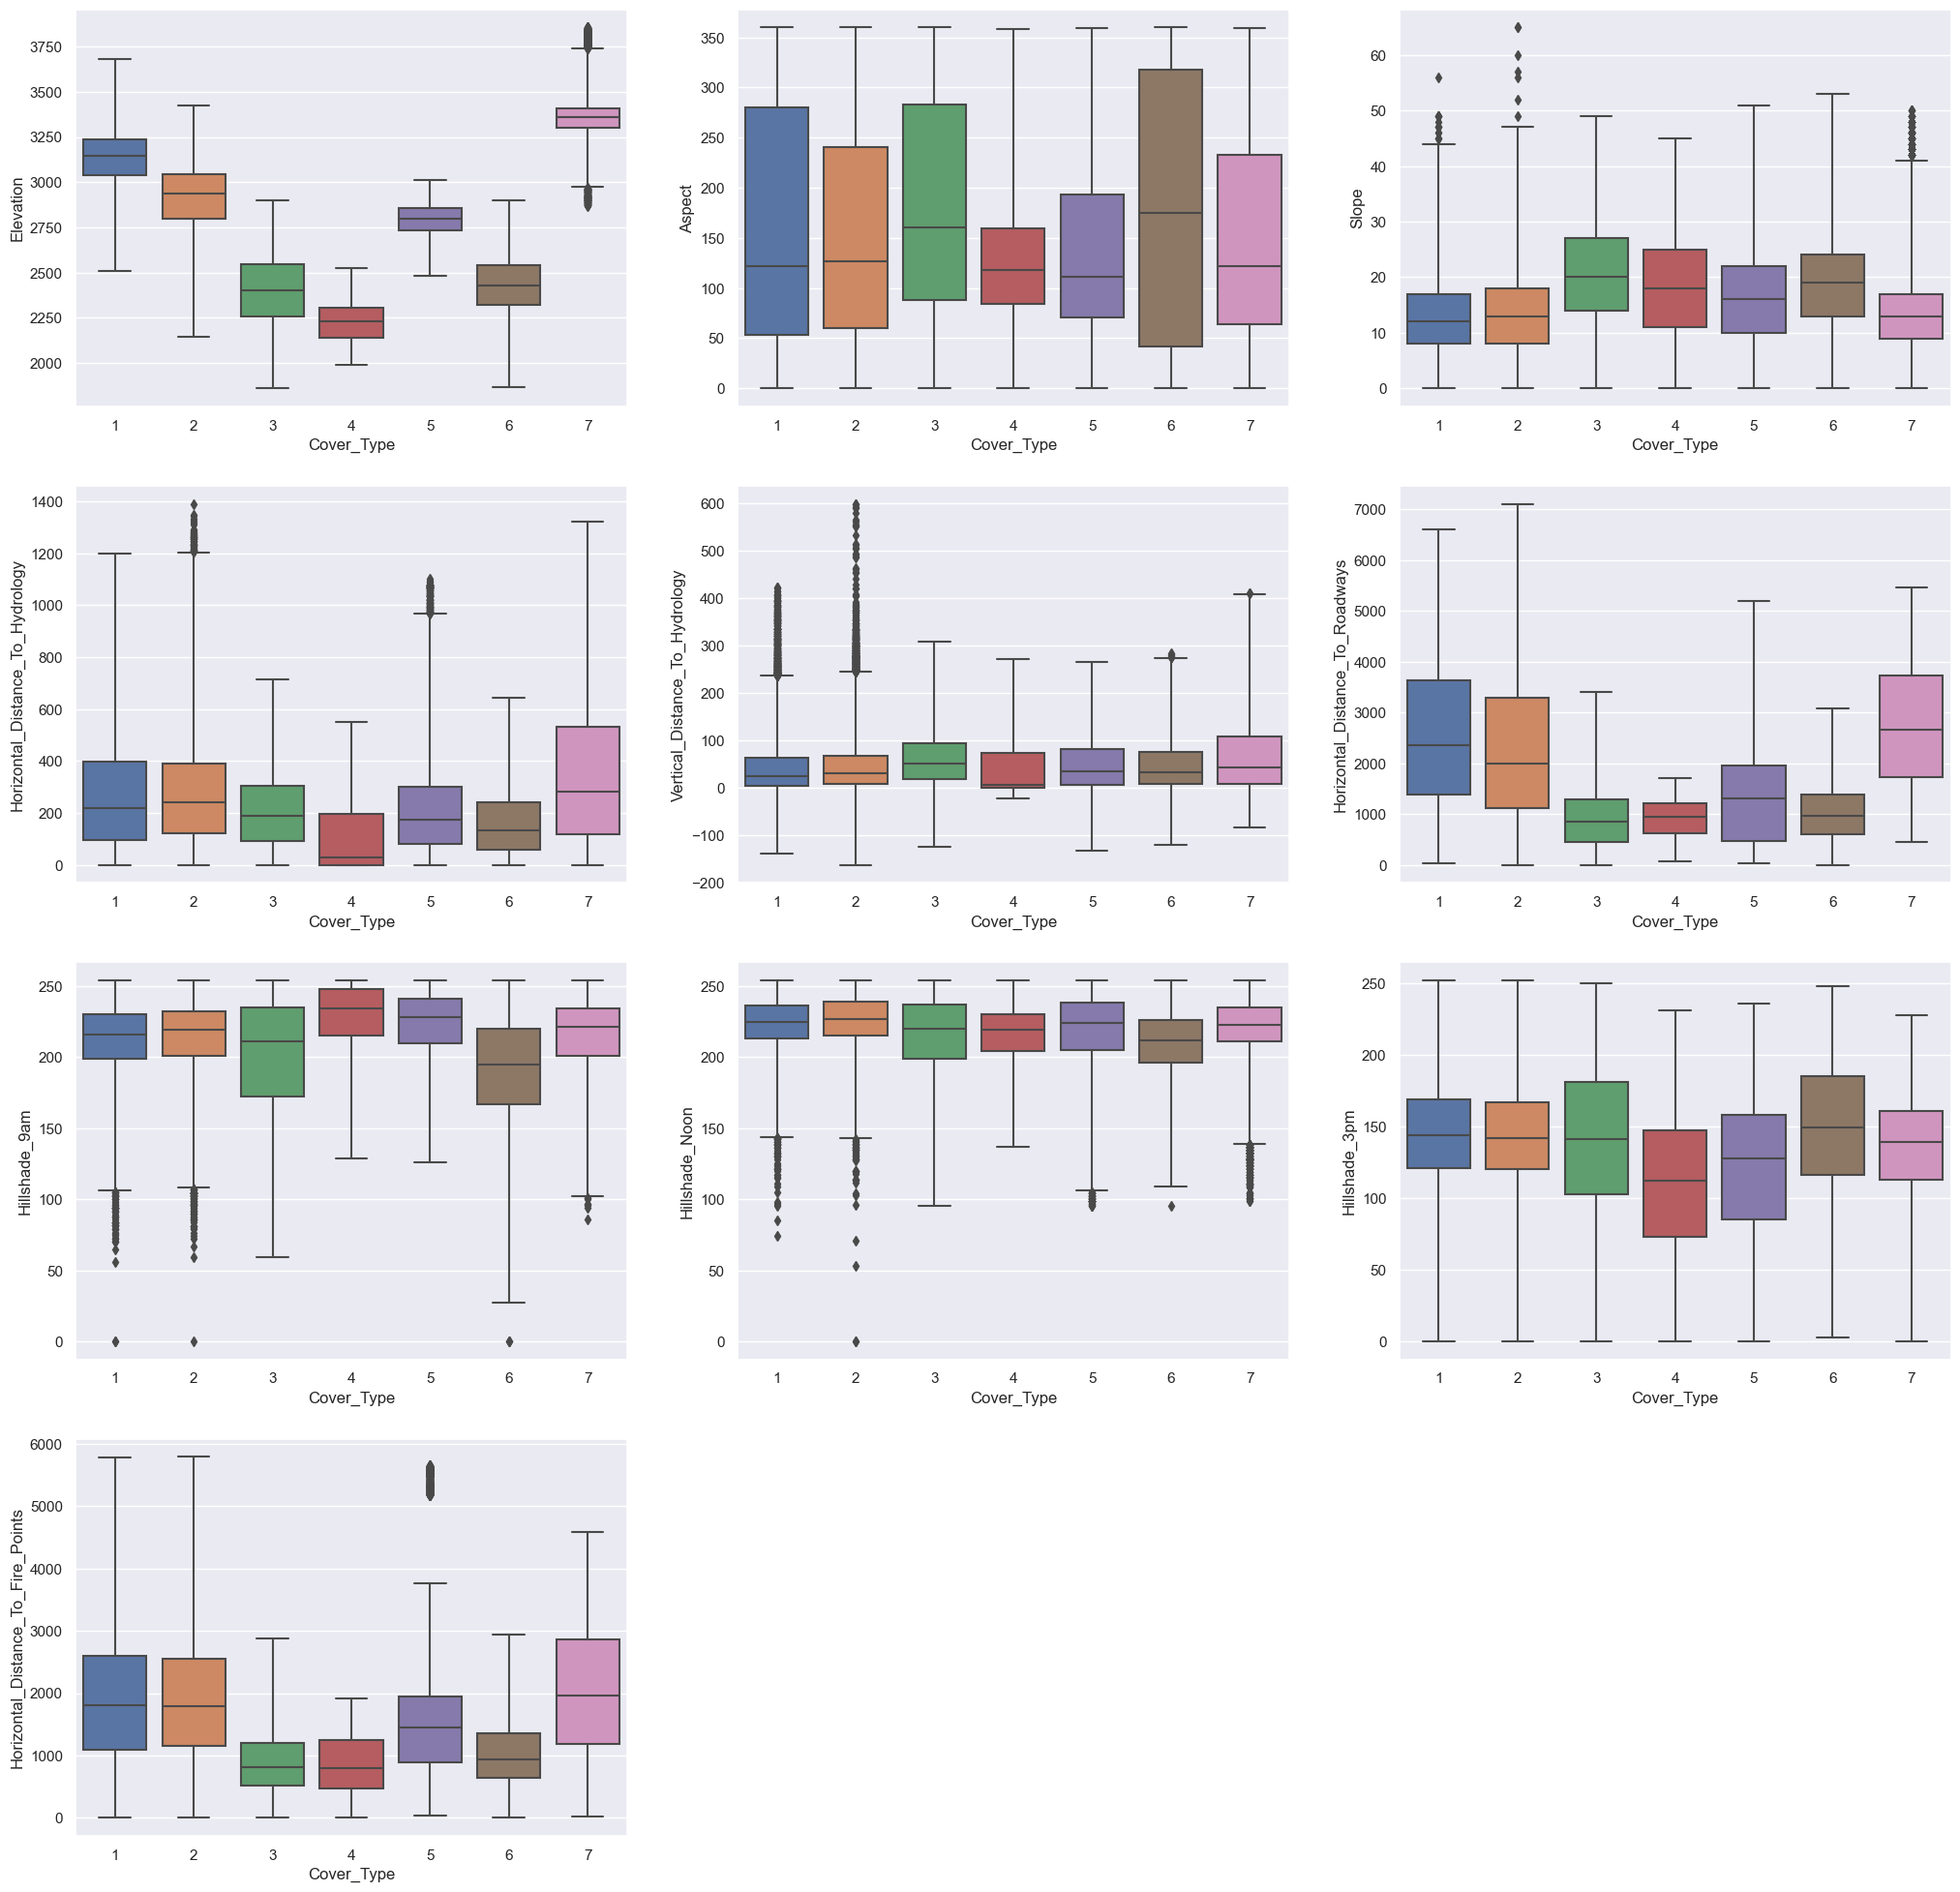

In [35]:
a=0
plt.figure(figsize=(25,25))
for i in df3.columns[:10]:
    a = a+1
    plt.subplot(4,3,a)
    sns.boxplot(x="Cover_Type",y=i,data=df3, whis=3)

### Now, let's take a closer look at correlation of continuous columns.

***
***

## 3. Feature Engineering

### My Plan of Feature Extraction
- First, I decided to produce&transform a new column with ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns. New column will contain the values of **Hypotenuse** of ``horizantal`` and ``vertical`` distances.

- As second, we can produce&transform an additional column which contains **average** of Horizantal Distances to Hydrology and Roadways.

- Third, I decided to transform a new column which contains **average** of `Elevation` and ``Vertical_Distance_To_Hydrology`` columns. So that, there is no need to have ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns, because I have new columns which represent more value than them. I decide to drop these columns.

- Note that, after seeing the result of the models, there may be a possibility of making minor changes to the features in the modeling phase.

In [37]:
df3["Hypotenuse"]=(df3.Horizontal_Distance_To_Hydrology**2+df3.Vertical_Distance_To_Hydrology**2)**0.5
df3["Hypotenuse"]

0         217.366
1         139.843
2         361.292
3         321.753
4         520.551
           ...   
249995     51.865
249996    290.878
249997      0.000
249998      0.000
249999   1154.671
Name: Hypotenuse, Length: 247606, dtype: float64

In [38]:
df3["Hyd_Road_avg"]=(df3["Horizontal_Distance_To_Hydrology"]+df3["Horizontal_Distance_To_Roadways"])/2
df3["Hyd_Road_avg"]

0        1228.500
1        1934.000
2        2357.500
3         795.000
4         538.500
           ...   
249995    258.000
249996   1139.000
249997    714.500
249998    674.500
249999   3108.500
Name: Hyd_Road_avg, Length: 247606, dtype: float64

In [39]:
df3["Hydro_Ele_avg"]=(df3["Horizontal_Distance_To_Hydrology"]+df3["Elevation"])/2
df3["Hydro_Ele_avg"]

0        1454.000
1        1701.500
2        1814.500
3        1558.500
4        1877.500
           ...   
249995   1080.500
249996   1561.500
249997   1168.000
249998   1281.500
249999   2416.000
Name: Hydro_Ele_avg, Length: 247606, dtype: float64

In [40]:
df3.drop(["Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology"], axis=1,inplace=True)

In [41]:
df3.shape

(247606, 56)

In [42]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247606 entries, 0 to 249999
Data columns (total 56 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           247606 non-null  int64  
 1   Aspect                              247606 non-null  int64  
 2   Slope                               247606 non-null  int64  
 3   Horizontal_Distance_To_Roadways     247606 non-null  int64  
 4   Hillshade_9am                       247606 non-null  int64  
 5   Hillshade_Noon                      247606 non-null  int64  
 6   Hillshade_3pm                       247606 non-null  int64  
 7   Horizontal_Distance_To_Fire_Points  247606 non-null  int64  
 8   Wilderness_Area_1                   247606 non-null  int64  
 9   Wilderness_Area_2                   247606 non-null  int64  
 10  Wilderness_Area_3                   247606 non-null  int64  
 11  Wilderness_Area_4         

***
***

## 4. Prediction (Multi-class Classification)

If you have done, use your data set resulting from Feature Engineering task. If you haven't done Feature Engineering, use the latest version of your data set.
In this section, you have two main tasks that apply to each algorithm:
1. Model Building and Prediction

 - SVM (Use ``LinearSVC`` model from``sklearn.svm`` module)
 - Decision Tree (Use ``DecisionTreeClassifier`` model from ``sklearn.tree`` module)
 - Random Forest (Use ``RandomForestClassifier`` model from ``sklearn.ensemble`` module) 
 - XGBoost (Use ``XGBClassifier`` model from``xgboost`` module)

2. Visualizing the Result

- Use [yellowbrick](https://www.scikit-yb.org/en/latest/), [seaborn](https://seaborn.pydata.org/tutorial/regression.html) or [matplotlib](https://matplotlib.org/) modules to visualize the model results.

- Show three plots for the results:
 - Class Prediction Error Bar Plot
 - Confusion Matrix
 - Classification Report

### Import Libraries

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### Data Preprocessing

- Drop target variable
- Train-Test Split

*Note: You can use the train and test data generated here for all algorithms.*

In [43]:
X=df3.drop(["Cover_Type"], axis=1)
y=df3["Cover_Type"]

In [45]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, stratify=y, random_state=101)

In [46]:
scaler=StandardScaler()

In [47]:
X_train_scaled=scaler.fit_transform(X_train)

In [48]:
X_test_scaled=scaler.transform(X_test)

In [49]:
y_test.shape

(49522,)

In [50]:
df3.shape

(247606, 56)

## 1. Implement Support Vector Machine
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

*Note: You probably won't get a successful result. You may need to make some changes to the model or data. This may be a topic worth investigating, you decide.*

In [51]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix 
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, auc, roc_curve, average_precision_score, precision_recall_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [52]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report,confusion_matrix

In [54]:
svm_model=LinearSVC(random_state=60)  # I'm from Tokat

In [55]:
svm_model.fit(X_train_scaled, y_train)

LinearSVC(random_state=60)

In [56]:
y_pred=svm_model.predict(X_test_scaled)

In [57]:
y_pred_proba=svm_model._predict_proba_lr(X_test_scaled)

In [58]:
model=LinearSVC(random_state=60)

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.62      0.66      0.64      7068
           2       0.58      0.46      0.51      6900
           3       0.61      0.51      0.56      7078
           4       0.77      0.91      0.84      7106
           5       0.62      0.70      0.66      7093
           6       0.58      0.57      0.57      7139
           7       0.87      0.89      0.88      7138

    accuracy                           0.67     49522
   macro avg       0.66      0.67      0.66     49522
weighted avg       0.67      0.67      0.67     49522



In [60]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score

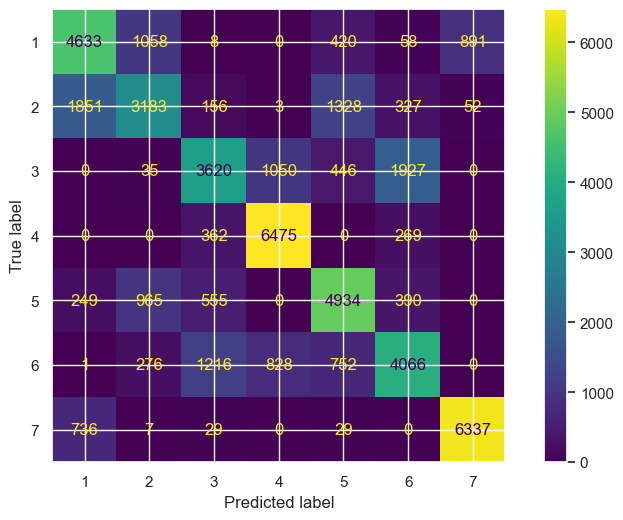

In [61]:
plot_confusion_matrix(svm_model, X_test_scaled, y_test);

In [62]:
from yellowbrick.classifier import ClassPredictionError

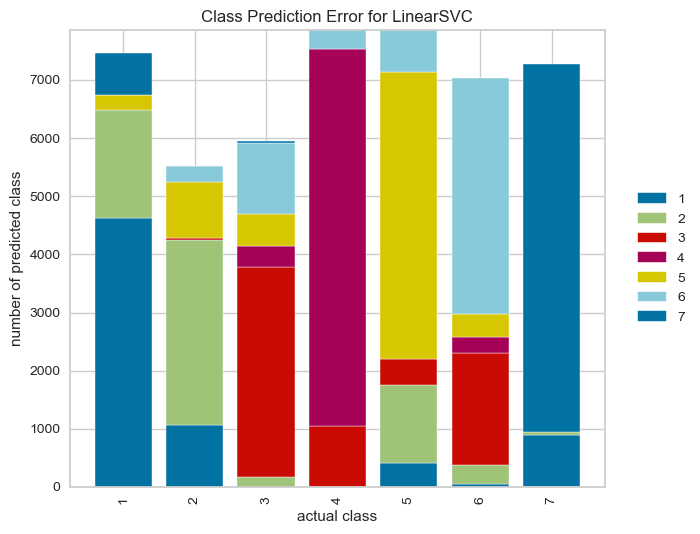

<AxesSubplot:title={'center':'Class Prediction Error for LinearSVC'}, xlabel='actual class', ylabel='number of predicted class'>

In [63]:

visualizer = ClassPredictionError(svm_model)
visualizer.fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

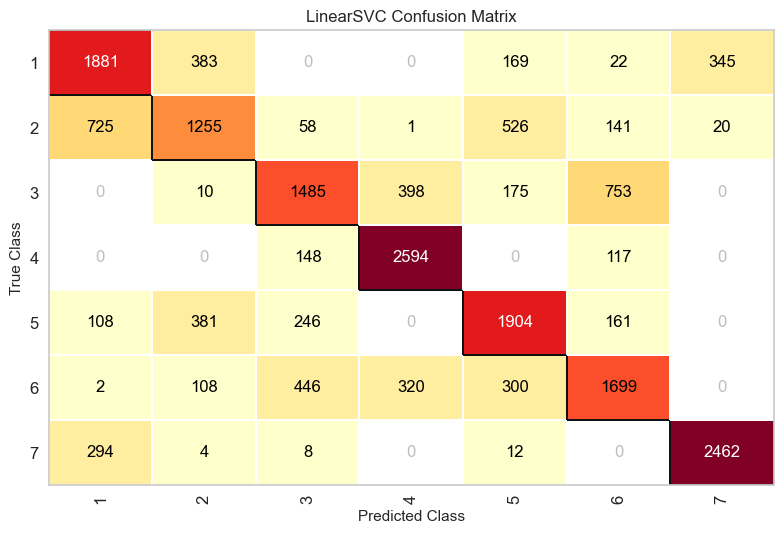

<AxesSubplot:title={'center':'LinearSVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [100]:
from yellowbrick.classifier import ConfusionMatrix

c_mat = ConfusionMatrix(svm_model)
c_mat.fit(X_train_scaled, y_train)
c_mat.score(X_test_scaled, y_test)
c_mat.show()

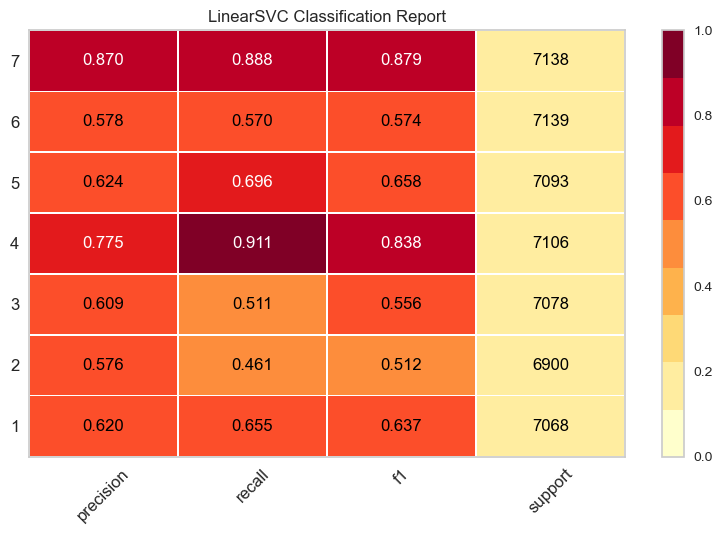

<AxesSubplot:title={'center':'LinearSVC Classification Report'}>

In [69]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(svm_model, support=True)
visualizer.fit(X_train_scaled, y_train)        
visualizer.score(X_test_scaled, y_test)        
visualizer.show()

### 1.1 GridSearch

In [67]:
svm_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': True,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'squared_hinge',
 'max_iter': 1000,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': 60,
 'tol': 0.0001,
 'verbose': 0}

In [70]:
grid.get_params()

NameError: name 'grid' is not defined

In [71]:
svm_model = LinearSVC()
param_grid = {'C':[0.01,0.1,1,10],'penalty':["l1","l2"],"random_state":[101]}
grid = GridSearchCV(svm_model,param_grid, cv=5)

In [72]:
grid.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__C': 1.0,
 'estimator__class_weight': None,
 'estimator__dual': True,
 'estimator__fit_intercept': True,
 'estimator__intercept_scaling': 1,
 'estimator__loss': 'squared_hinge',
 'estimator__max_iter': 1000,
 'estimator__multi_class': 'ovr',
 'estimator__penalty': 'l2',
 'estimator__random_state': None,
 'estimator__tol': 0.0001,
 'estimator__verbose': 0,
 'estimator': LinearSVC(),
 'n_jobs': None,
 'param_grid': {'C': [0.01, 0.1, 1, 10],
  'penalty': ['l1', 'l2'],
  'random_state': [101]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [74]:
grid.fit(X,y)

GridSearchCV(cv=5, estimator=LinearSVC(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'random_state': [101]})

In [75]:
grid.best_score_

0.4857069578792122

In [76]:
grid.best_params_

{'C': 0.1, 'penalty': 'l2', 'random_state': 101}

In [77]:
y_pred_grid=grid.predict(X_test_scaled)

In [78]:
print(classification_report(y_test, y_pred_grid))

              precision    recall  f1-score   support

           1       0.57      0.34      0.42      7068
           2       0.43      0.57      0.49      6900
           3       0.52      0.37      0.43      7078
           4       0.62      0.84      0.72      7106
           5       0.50      0.56      0.53      7093
           6       0.45      0.56      0.50      7139
           7       0.87      0.56      0.68      7138

    accuracy                           0.54     49522
   macro avg       0.57      0.54      0.54     49522
weighted avg       0.57      0.54      0.54     49522



In [79]:
svc_acc = accuracy_score(y_test, y_pred_grid)
svc_f1 = f1_score(y_test, y_pred_grid, average = "macro")
svc_recall= recall_score(y_test, y_pred_grid, average = "macro")
svc_precision=precision_score(y_test, y_pred_grid, average = "macro")
svc_auc = roc_auc_score(y_test, y_pred_proba, average = "macro", multi_class = "ovo")

## 2. Implement Decision Tree Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [80]:
from sklearn.tree import DecisionTreeClassifier

In [81]:
DT_model = DecisionTreeClassifier(random_state=60)

In [83]:
DT_model.fit(X_train_scaled,y_train)

DecisionTreeClassifier(random_state=60)

DT_model.fit(X_train_scaled,y_train)

In [84]:
y_pred = DT_model.predict(X_test_scaled)

In [85]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.87      0.86      0.87      7068
           2       0.85      0.84      0.84      6900
           3       0.95      0.94      0.95      7078
           4       0.99      0.99      0.99      7106
           5       0.97      0.98      0.98      7093
           6       0.95      0.96      0.95      7139
           7       0.98      0.99      0.98      7138

    accuracy                           0.94     49522
   macro avg       0.94      0.94      0.94     49522
weighted avg       0.94      0.94      0.94     49522



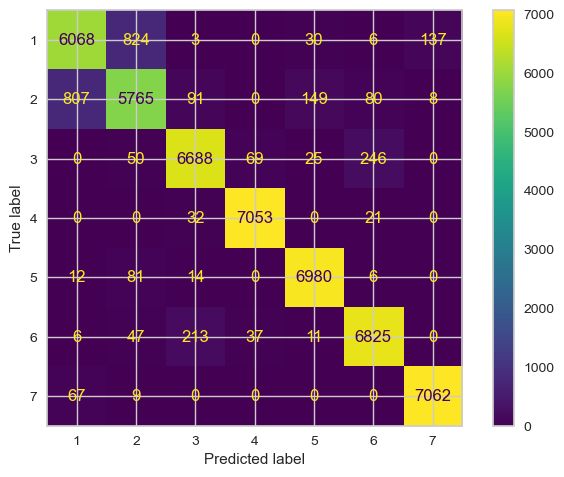

In [86]:
plot_confusion_matrix(DT_model, X_test_scaled, y_test);

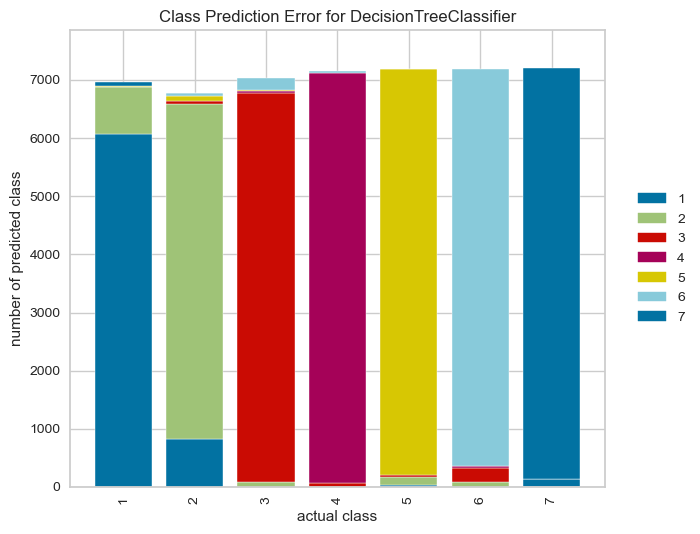

<AxesSubplot:title={'center':'Class Prediction Error for DecisionTreeClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [87]:

visualizer = ClassPredictionError(DT_model)
visualizer.fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

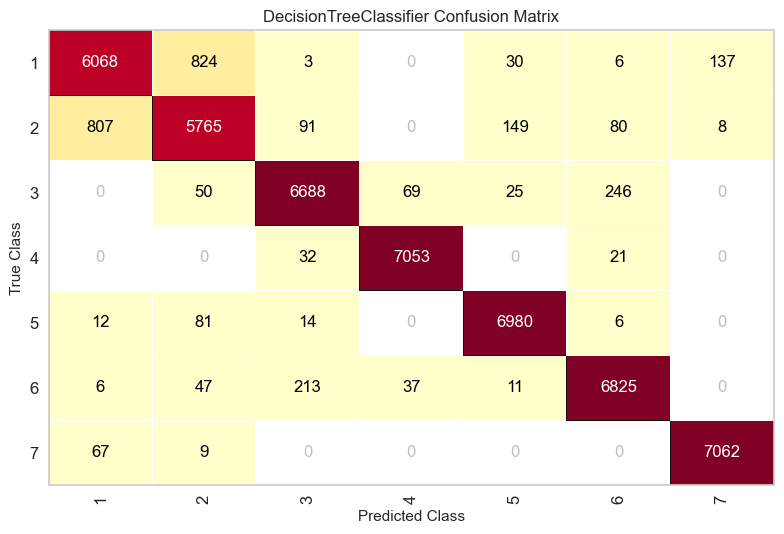

<AxesSubplot:title={'center':'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [88]:
from yellowbrick.classifier import ConfusionMatrix

c_mat = ConfusionMatrix(DT_model)
c_mat.fit(X_train_scaled, y_train)
c_mat.score(X_test_scaled, y_test)
c_mat.show()

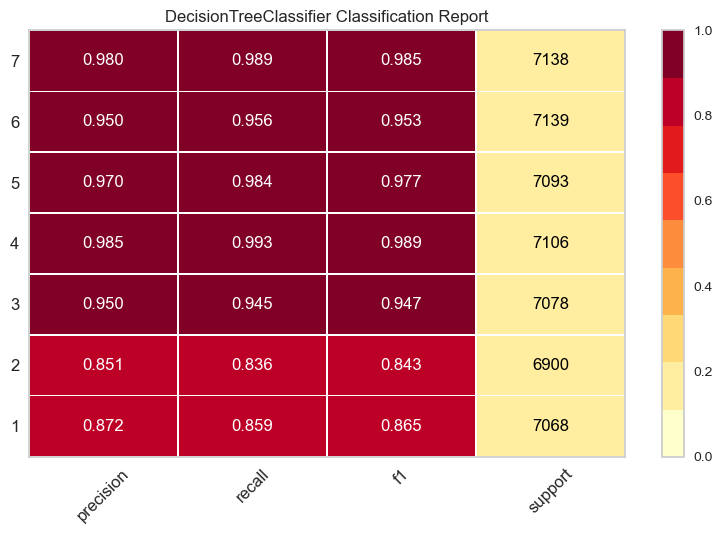

<AxesSubplot:title={'center':'DecisionTreeClassifier Classification Report'}>

In [89]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(DT_model, support=True)
visualizer.fit(X_train_scaled, y_train)        
visualizer.score(X_test_scaled, y_test)        
visualizer.show()

In [90]:
DT_acc = accuracy_score(y_test, y_pred_grid)
DT_f1 = f1_score(y_test, y_pred_grid, average = "macro")
DT_recall= recall_score(y_test, y_pred_grid, average = "macro")
DT_precision=precision_score(y_test, y_pred_grid, average = "macro")
DT_auc = roc_auc_score(y_test, y_pred_proba, average = "macro", multi_class = "ovo")

## 3. Implement Random Forest Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [91]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
rf_model = RandomForestClassifier(class_weight="balanced",random_state=60)

In [93]:
rf_model.fit(X_train_scaled,y_train)

RandomForestClassifier(class_weight='balanced', random_state=60)

rf_model.fit(X_train_scaled,y_train) 

In [94]:
y_pred=rf_model.predict(X_test_scaled)

In [95]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.93      0.91      0.92      7068
           2       0.92      0.89      0.91      6900
           3       0.98      0.97      0.98      7078
           4       0.99      1.00      0.99      7106
           5       0.98      1.00      0.99      7093
           6       0.97      0.99      0.98      7139
           7       0.99      1.00      0.99      7138

    accuracy                           0.97     49522
   macro avg       0.96      0.97      0.96     49522
weighted avg       0.97      0.97      0.97     49522



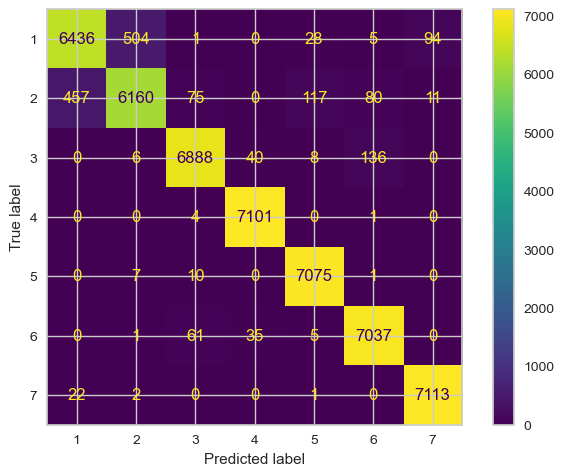

In [96]:
plot_confusion_matrix(rf_model, X_test_scaled, y_test);

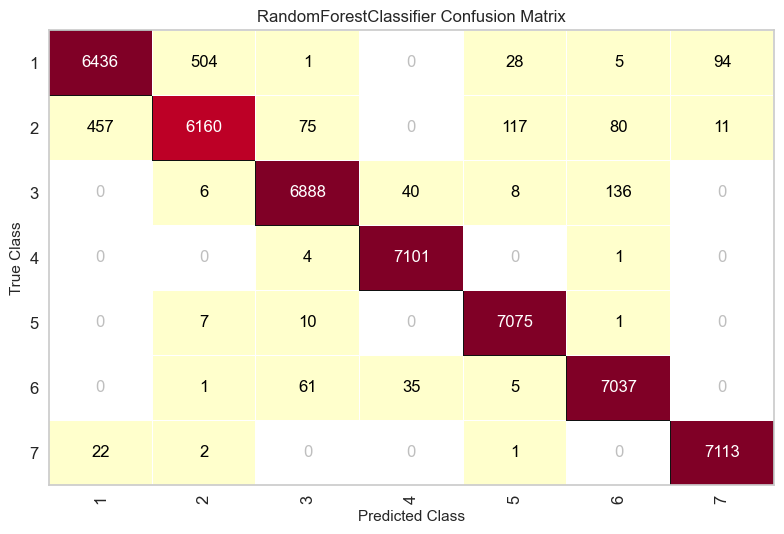

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [97]:
from yellowbrick.classifier import ConfusionMatrix

c_mat = ConfusionMatrix(rf_model)
c_mat.fit(X_train_scaled, y_train)
c_mat.score(X_test_scaled, y_test)
c_mat.show()

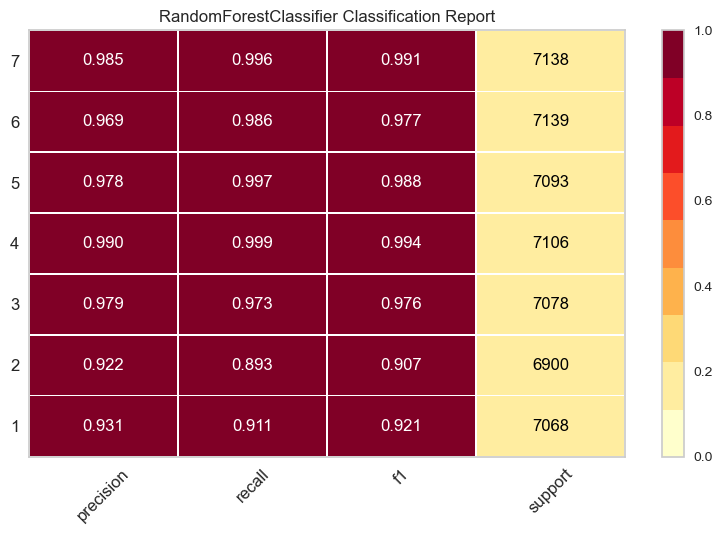

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [98]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(rf_model, support=True)
visualizer.fit(X_train_scaled, y_train)        
visualizer.score(X_test_scaled, y_test)        
visualizer.show()

In [99]:
rf_acc = accuracy_score(y_test, y_pred_grid)
rf_f1 = f1_score(y_test, y_pred_grid, average = "macro")
rf_recall= recall_score(y_test, y_pred_grid, average = "macro")
rf_precision=precision_score(y_test, y_pred_grid, average = "macro")
rf_auc = roc_auc_score(y_test, y_pred_proba, average = "macro", multi_class = "ovo")

## 4. Implement XGBoost Classifer
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [100]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [101]:
pip install --upgrade pip

  Attempting uninstall: pip
    Found existing installation: pip 21.0.1
    Uninstalling pip-21.0.1:
      Successfully uninstalled pip-21.0.1
Note: you may need to restart the kernel to use updated packages.


In [102]:
from xgboost import XGBClassifier

In [103]:
xgb_model = XGBClassifier(random_state=60)

In [105]:
xgb_model.fit(X_train_scaled, y_train)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4 5 6], got [1 2 3 4 5 6 7]

In [106]:
y_pred=xgb_model.predict(X_test_scaled)

NotFittedError: need to call fit or load_model beforehand

In [107]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.93      0.91      0.92      7068
           2       0.92      0.89      0.91      6900
           3       0.98      0.97      0.98      7078
           4       0.99      1.00      0.99      7106
           5       0.98      1.00      0.99      7093
           6       0.97      0.99      0.98      7139
           7       0.99      1.00      0.99      7138

    accuracy                           0.97     49522
   macro avg       0.96      0.97      0.96     49522
weighted avg       0.97      0.97      0.97     49522



In [108]:
plot_confusion_matrix(xgb_model, X_test_scaled, y_test);

NotFittedError: need to call fit or load_model beforehand

In [ ]:

visualizer = XGBClassifier((xgb_model)
visualizer.fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

c_mat = ConfusionMatrix(xgb_model)
c_mat.fit(X_train_scaled, y_train)
c_mat.score(X_test_scaled, y_test)
c_mat.show()

In [ ]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(xgb_model, support=True)
visualizer.fit(X_train_scaled, y_train)        
visualizer.score(X_test_scaled, y_test)        
visualizer.show()

In [180]:
xgb_acc = accuracy_score(y_test, y_pred)
xgb_f1 = f1_score(y_test, y_pred, average = "macro")
xgb_recall= recall_score(y_test, y_pred, average = "macro")
xbg_precision=precision_score(y_test, y_pred, average = "macro")
xbg_auc = roc_auc_score(y_test, y_pred_proba, average = "macro", multi_class = "ovo")

### Compare The Models

So far, you have created a multi-classifier model with 4 different algorithms and made predictions. You can observe the performance of the models together with a barplot of your choice.

- Which algorithm did you achieve the highest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

In contrast;

- Which algorithm did you achieve the lowest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

The answers you will look for to these questions will increase your gains from Machine Learning course.

In [ ]:
compare = pd.DataFrame({"Model": ["SVC", "DT","RF", "XGBoost"],
                        "Accuracy": [svc_acc, dt_acc, rf_acc, xgb_acc],
                        "F1_Score": [svc_f1, dt_f1, rf_f1, xgb_f1],
                        "Recall_Score": [svc_recall, dt_recall, rf_recall, xgb_recall],
                        "Precision_Score": [svc_precision, dt_precision, rf_precision, xgb_precision],
                        "ROC_AUC_Score": [svc_auc, dt_auc, rf_auc, xgb_auc]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(15,30))
plt.subplot(611)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(612)
compare = compare.sort_values(by="F1_Score", ascending=False)
ax=sns.barplot(x="F1_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(613)
compare = compare.sort_values(by="Recall_Score", ascending=False)
ax=sns.barplot(x="Recall_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(614)
compare = compare.sort_values(by= "Precision_Score", ascending=False)
ax=sns.barplot(x="Precision_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(615)
compare = compare.sort_values(by="ROC_AUC_Score", ascending=False)
ax=sns.barplot(x="ROC_AUC_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)


plt.show()

# Accuracy Comparison

# F1 Score Comparison

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___